<a href="https://colab.research.google.com/github/Sayali-1902/Gradient-Gains-BCS-Winter-project-2025-/blob/main/%7B250380%7D_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

data = yf.download("RELIANCE.NS", start="2023-12-18", end="2025-12-18")
data.to_csv("RIL_historical.csv")

/tmp/ipython-input-91317800.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("RELIANCE.NS", start="2023-12-18", end="2025-12-18")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-12-18,1251.239014,1258.137903,1236.324379,1238.632370,14165188
2023-12-19,1269.652710,1277.494571,1253.323497,1268.114050,16820604
2023-12-20,1254.291382,1289.878086,1250.742696,1276.080186,17736722
2023-12-21,1271.861450,1277.296201,1249.874163,1254.217020,13765454
2023-12-22,1273.102173,1280.968874,1264.466020,1270.397218,16541784


In [ ]:
# Calculating SMA(20)
def SMA_20(data):
  data["SMA_20","RELIANCE.NS"] = data["Close"].rolling(20).mean()
SMA_20(data)
data.tail()

Price,Close,High,Low,Open,Volume,SMA_20
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1541.465009
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1543.345007
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1545.240002
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1546.385004
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1547.660004


In [ ]:
#Calculating EMA(20)

def EMA(data, n):
  return data["Close", "RELIANCE.NS"].ewm(span=n, adjust=False).mean()

data["EMA_20", "RELIANCE.NS"] = EMA(data,20)
data.tail()

Price,Close,High,Low,Open,Volume,SMA_20,EMA_20
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,,
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1541.465009,1533.148294
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1543.345007,1535.372266
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1545.240002,1537.355855
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1546.385004,1537.826730
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1547.660004,1538.452758


In [ ]:
# MACD Line

def MACD_line(data):
  data["MACD_Line", "RELIANCE.NS"] = EMA(data,12)-EMA(data,26)

def Signal_line(data):
  data["Signal_Line", "RELIANCE.NS"] = data["MACD_Line", "RELIANCE.NS"].ewm(span=9, adjust=False).mean()  #EMA of MACD Line for 9 days

MACD_line(data)
Signal_line(data)
data.tail()

Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,MACD_Line,Signal_Line
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,,,,
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1541.465009,1533.148294,15.068814,20.392491
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1543.345007,1535.372266,15.235234,19.361040
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1545.240002,1537.355855,15.168064,18.522444
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1546.385004,1537.826730,13.833758,17.584707
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1547.660004,1538.452758,12.798231,16.627412


In [ ]:
# RSI

def RSI(data, window):
  delta = data["Close"].diff()      # Difference between Closing prices of today and yesterday
  gains = delta.clip(lower = 0)     # Consider only positive values of delta
  losses = -delta.clip(upper = 0)   # Consider only positive values of delta
  avg_gain = gains.rolling(window=window, min_periods=window).mean()
  avg_loss = losses.rolling(window=window, min_periods=window).mean()

  rs = avg_gain/avg_loss            #Relative Strength

  data["RSI", "RELIANCE.NS"] = 100 - (100 / (1 + rs))

RSI(data, 14)
data.tail()

Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,MACD_Line,Signal_Line,RSI
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,,,,,
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1541.465009,1533.148294,15.068814,20.392491,49.353806
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1543.345007,1535.372266,15.235234,19.361040,58.266444
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1545.240002,1537.355855,15.168064,18.522444,56.812546
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1546.385004,1537.826730,13.833758,17.584707,36.832064
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1547.660004,1538.452758,12.798231,16.627412,40.537839


In [ ]:
#Stochastic Oscillator

def K(data, n):
  low_min = data["Low", "RELIANCE.NS"].rolling(n).min()
  high_max = data["High", "RELIANCE.NS"].rolling(n).max()

  data["%K", "RELIANCE.NS"] = 100 * (data["Close", "RELIANCE.NS"] - low_min) / (high_max - low_min)

def D(data, n):
  data["%D", "RELIANCE.NS"] = data["%K", "RELIANCE.NS"].rolling(n).mean()

K(data, 14)
D(data, 3)

data.tail()

Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,MACD_Line,Signal_Line,RSI,%K,%D
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,,,,,,,
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1541.465009,1533.148294,15.068814,20.392491,49.353806,43.014118,30.612274
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1543.345007,1535.372266,15.235234,19.361040,58.266444,61.067472,44.793302
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1545.240002,1537.355855,15.168064,18.522444,56.812546,60.596438,54.892676
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1546.385004,1537.826730,13.833758,17.584707,36.832064,38.775581,53.479830
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1547.660004,1538.452758,12.798231,16.627412,40.537839,42.072242,47.148087


In [ ]:
# Bollinger Bands

def bands(data):
  data["Standard_deviation", "RELIANCE.NS"] = data["Close"].rolling(20).std()    #Calculating standard deviation for 20 days.
  data["Middle_Band", "RELIANCE.NS"] = data["SMA_20", "RELIANCE.NS"]
  data["Upper_Band", "RELIANCE.NS"] = data["Middle_Band", "RELIANCE.NS"] + 2 * data["Standard_deviation", "RELIANCE.NS"]
  data["Lower_Band", "RELIANCE.NS"] = data["Middle_Band", "RELIANCE.NS"] - 2 * data["Standard_deviation", "RELIANCE.NS"]

bands(data)
data = data.loc[:, data.columns !=( "Standard_deviation", "RELIANCE.NS")]
data.tail()

Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,MACD_Line,Signal_Line,RSI,%K,%D,Middle_Band,Upper_Band,Lower_Band
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,,,,,,,,,,
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1541.465009,1533.148294,15.068814,20.392491,49.353806,43.014118,30.612274,1541.465009,1573.850386,1509.079631
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1543.345007,1535.372266,15.235234,19.361040,58.266444,61.067472,44.793302,1543.345007,1574.559190,1512.130824
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1545.240002,1537.355855,15.168064,18.522444,56.812546,60.596438,54.892676,1545.240002,1574.598850,1515.881154
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1546.385004,1537.826730,13.833758,17.584707,36.832064,38.775581,53.479830,1546.385004,1573.174407,1519.595600
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1547.660004,1538.452758,12.798231,16.627412,40.537839,42.072242,47.148087,1547.660004,1571.167880,1524.152128


Final dataset below

In [ ]:
data.tail()

Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,MACD_Line,Signal_Line,RSI,%K,%D,Middle_Band,Upper_Band,Lower_Band
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,,,,,,,,,,
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4706197,1541.465009,1533.148294,15.068814,20.392491,49.353806,43.014118,30.612274,1541.465009,1573.850386,1509.079631
2025-12-12,1556.500000,1559.800049,1546.099976,1550.800049,5106655,1543.345007,1535.372266,15.235234,19.361040,58.266444,61.067472,44.793302,1543.345007,1574.559190,1512.130824
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1545.240002,1537.355855,15.168064,18.522444,56.812546,60.596438,54.892676,1545.240002,1574.598850,1515.881154
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1546.385004,1537.826730,13.833758,17.584707,36.832064,38.775581,53.479830,1546.385004,1573.174407,1519.595600
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1547.660004,1538.452758,12.798231,16.627412,40.537839,42.072242,47.148087,1547.660004,1571.167880,1524.152128


Visualisation below

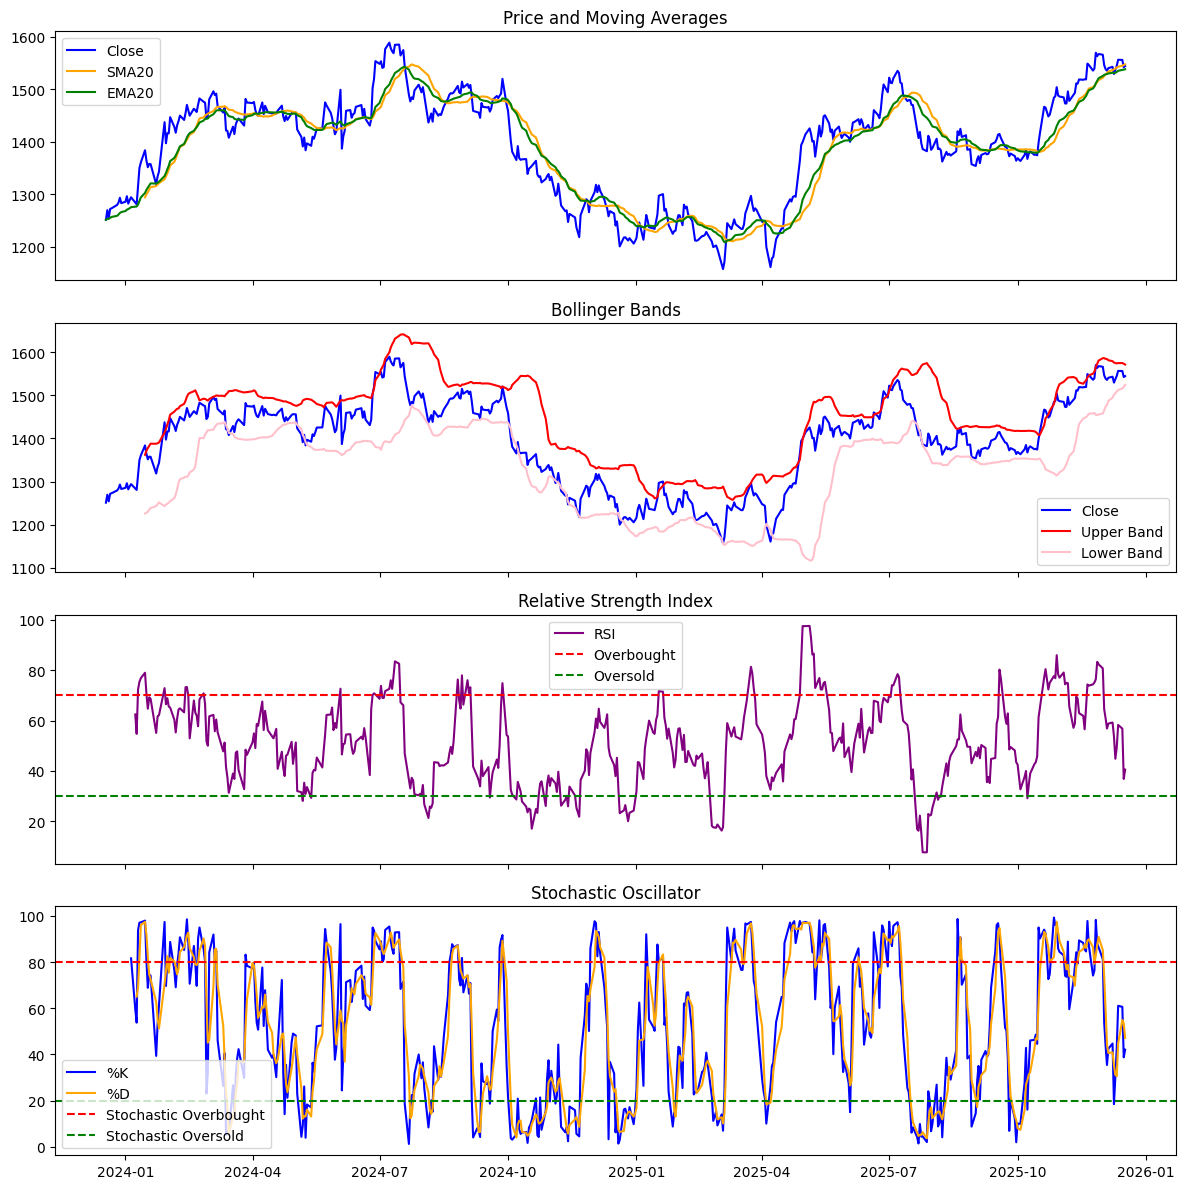

In [ ]:
from typing_extensions import dataclass_transform
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# 1. Price + SMA + EMA
axs[0].plot(data["Close", "RELIANCE.NS"], label="Close", color="blue")
axs[0].plot(data["SMA_20", "RELIANCE.NS"], label="SMA20", color="orange")
axs[0].plot(data["EMA_20", "RELIANCE.NS"], label="EMA20", color="green")
axs[0].set_title("Price and Moving Averages")
axs[0].legend()

# 2. Bollinger Bands
axs[1].plot(data["Close", "RELIANCE.NS"], label="Close", color="blue")
axs[1].plot(data["Upper_Band", "RELIANCE.NS"], label="Upper Band", color="red")
axs[1].plot(data["Lower_Band", "RELIANCE.NS"], label="Lower Band", color="pink")
axs[1].set_title("Bollinger Bands")
axs[1].legend()

# 3. RSI
axs[2].plot(data["RSI","RELIANCE.NS"], label="RSI", color="purple")
axs[2].axhline(70, label = "Overbought", color="red", linestyle="--")
axs[2].axhline(30, label = "Oversold", color="green", linestyle="--")
axs[2].set_title("Relative Strength Index")
axs[2].legend()

# 4. Stochastic Oscillator
axs[3].plot(data["%K", "RELIANCE.NS"], label="%K", color="blue")
axs[3].plot(data["%D", "RELIANCE.NS"], label="%D", color="orange")
axs[3].axhline(80, label = "Stochastic Overbought", color="red", linestyle="--")
axs[3].axhline(20, label = "Stochastic Oversold", color="green", linestyle="--")
axs[3].set_title("Stochastic Oscillator")
axs[3].legend()

plt.tight_layout()
plt.show()

In [ ]:
data.loc["2025-04-29"]

,,2025-04-29
Price,Ticker,
Close,RELIANCE.NS,1.394132e+03
High,RELIANCE.NS,1.405287e+03
Low,RELIANCE.NS,1.364550e+03
Open,RELIANCE.NS,1.365546e+03
Volume,RELIANCE.NS,3.253897e+07
SMA_20,RELIANCE.NS,1.258661e+03
EMA_20,RELIANCE.NS,1.277837e+03
MACD_Line,RELIANCE.NS,2.861801e+01
Signal_Line,RELIANCE.NS,1.287578e+01
